In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Load Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mack, Mrs. (Mary)",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Data visualization and pre-processing

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

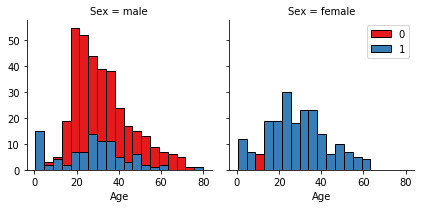

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

bins = np.linspace(df.Age.min(), df.Age.max(), 20)
g = sns.FacetGrid(df, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [9]:
# Checking how many male/female persons survived
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

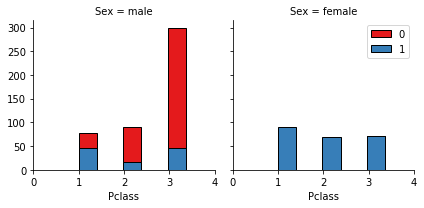

In [10]:
bins = np.linspace(df.Pclass.min(), df.Pclass.max())
g = sns.FacetGrid(df, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Pclass', ec="k", bins=bins, width=0.4, align='mid')

g.axes[-1].legend()
plt.xlim((0,4))
plt.show()

In [11]:
# Checking survivel dependence on Pclass
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

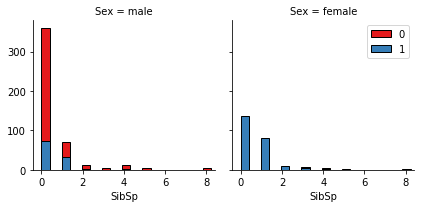

In [12]:
bins = np.linspace(df.SibSp.min(), df.SibSp.max())
g = sns.FacetGrid(df, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SibSp', ec="k", bins=bins, width=0.4, align='mid')

g.axes[-1].legend()
plt.show()

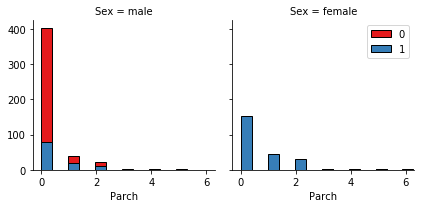

In [13]:
bins = np.linspace(df.Parch.min(), df.Parch.max())
g = sns.FacetGrid(df, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Parch', ec="k", bins=bins, width=0.4, align='mid')

g.axes[-1].legend()
plt.show()

## Missing Age Values

In [14]:
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mack, Mrs. (Mary)",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Convert Categorical features to numerical values

In [15]:
df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## Convert All Numeric Values to float

In [16]:
df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']] = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].astype('float')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",0.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",1.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",0.0,35.0,0.0,0.0,373450,8.0500,NaN,S


## Features Selection

In [17]:
Feature = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
Feature.head()

,Pclass,Sex,Age,SibSp,Parch
0,3.0,0.0,22.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0
2,3.0,1.0,26.0,0.0,0.0
3,1.0,1.0,35.0,1.0,0.0
4,3.0,0.0,35.0,0.0,0.0


In [18]:
X = Feature
X[0:6]

,Pclass,Sex,Age,SibSp,Parch
0,3.0,0.0,22.000000,1.0,0.0
1,1.0,1.0,38.000000,1.0,0.0
2,3.0,1.0,26.000000,0.0,0.0
3,1.0,1.0,35.000000,1.0,0.0
4,3.0,0.0,35.000000,0.0,0.0
5,3.0,0.0,29.699118,0.0,0.0


In [19]:
y = df['Survived'].values
y[:10]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

## Normalizing Data

In [20]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361],
       [-1.56610693,  1.35557354,  0.40792596,  0.43279337, -0.47367361],
       [ 0.82737724, -0.73769513,  0.40792596, -0.4745452 , -0.47367361]])

## Train/Test Splitting

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Train set (712, 5) (712,)
Test set (179, 5) (179,)


## KNN Model

In [22]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Ks = 100
f1_neig, jac_neig = np.zeros(Ks-1), np.zeros(Ks-1)
for i in range(1, Ks):
    neig = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    yhat_neig = neig.predict(X_test)
    f1_neig[i-1] = metrics.f1_score(y_test, yhat_neig)
    jac_neig[i-1] = metrics.jaccard_similarity_score(y_test, yhat_neig)
print('Max  f1 score = %.4f with k = %s' % (f1_neig.max(), f1_neig.argmax()+1))
print('Max jac score = %.4f with k = %s' % (jac_neig.max(), jac_neig.argmax()+1))

Max  f1 score = 0.7692 with k = 21
Max jac score = 0.8547 with k = 22


In [23]:
print(f1_neig[19:25])
print(jac_neig[19:25])

[0.73873874 0.76923077 0.76785714 0.76521739 0.76363636 0.75438596]
[0.83798883 0.84916201 0.8547486  0.84916201 0.8547486  0.84357542]


**The best k = 22**

## SVM Model

In [24]:
from sklearn import svm

kers = ['poly', 'linear', 'rbf', 'sigmoid']
f1_svm = np.zeros((len(kers)))
jac_svm = np.zeros((len(kers)))
for i in range(len(kers)):
    loan_svm = svm.SVC(kernel=kers[i], gamma='auto')
    loan_svm.fit(X_train, y_train)
    yhat_svm = loan_svm.predict(X_test)
    f1_svm[i] = metrics.f1_score(y_test, yhat_svm)
    jac_svm[i] = metrics.jaccard_similarity_score(y_test, yhat_svm)

print('Max f1-score = %.4f with kernel = %s' % (f1_svm.max(), kers[f1_svm.argmax()]))
print(f1_svm)
print('Max jaccard  = %.4f with kernel = %s' % (jac_svm.max(), kers[f1_svm.argmax()]))
print(jac_svm)

Max f1-score = 0.7788 with kernel = rbf
[0.72566372 0.69642857 0.77876106 0.61111111]
Max jaccard  = 0.8603 with kernel = rbf
[0.82681564 0.81005587 0.8603352  0.76536313]


# The Models Evaluation Using Test Set

In [25]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
test_df.shape

(418, 11)

In [27]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Cook, Mrs. (Selena Rogers)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


## Test Set Pre-processing

In [29]:
test_df['Age'].replace(np.nan, test_df['Age'].mean(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
test_df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']] = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].astype('float')
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3.0,"Kelly, Mr. James",0.0,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893,3.0,"Wilkes, Mrs. James (Ellen Needs)",1.0,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894,2.0,"Myles, Mr. Thomas Francis",0.0,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895,3.0,"Wirz, Mr. Albert",0.0,27.0,0.0,0.0,315154,8.6625,NaN,S
4,896,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.0,22.0,1.0,1.0,3101298,12.2875,NaN,S
5,897,3.0,"Svensson, Mr. Johan Cervin",0.0,14.0,0.0,0.0,7538,9.2250,NaN,S
6,898,3.0,"Connolly, Miss. Kate",1.0,30.0,0.0,0.0,330972,7.6292,NaN,Q
7,899,2.0,"Caldwell, Mr. Albert Francis",0.0,26.0,1.0,1.0,248738,29.0000,NaN,S
8,900,3.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1.0,18.0,0.0,0.0,2657,7.2292,NaN,C
9,901,3.0,"Davies, Mr. John Samuel",0.0,21.0,2.0,0.0,A/4 48871,24.1500,NaN,S


In [32]:
test_Feature = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
X_GT = test_Feature
X_GT[:10]

,Pclass,Sex,Age,SibSp,Parch
0,3.0,0.0,34.5,0.0,0.0
1,3.0,1.0,47.0,1.0,0.0
2,2.0,0.0,62.0,0.0,0.0
3,3.0,0.0,27.0,0.0,0.0
4,3.0,1.0,22.0,1.0,1.0
5,3.0,0.0,14.0,0.0,0.0
6,3.0,1.0,30.0,0.0,0.0
7,2.0,0.0,26.0,1.0,1.0
8,3.0,1.0,18.0,0.0,0.0
9,3.0,0.0,21.0,2.0,0.0


In [33]:
X_GT = preprocessing.StandardScaler().fit(X_GT).transform(X_GT)
X_GT[:5]

array([[ 0.87348191, -0.75592895,  0.3349926 , -0.49947002, -0.4002477 ],
       [ 0.87348191,  1.32287566,  1.32553003,  0.61699237, -0.4002477 ],
       [-0.31581919, -0.75592895,  2.51417495, -0.49947002, -0.4002477 ],
       [ 0.87348191, -0.75592895, -0.25932986, -0.49947002, -0.4002477 ],
       [ 0.87348191,  1.32287566, -0.65554483,  0.61699237,  0.61989583]])

## KNN

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=22).fit(X_train, y_train)
yhat_knn = knn_model.predict(X_GT)
yhat_knn = yhat_knn.astype('int')
yhat_knn[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

## SVM

In [35]:
svm_model = svm.SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
yhat_svm = svm_model.predict(X_GT)
yhat_svm = yhat_svm.astype('int')
yhat_svm[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

# Report

## KNN Report

In [36]:
report_df = pd.DataFrame(yhat_knn)
report_df.rename(columns={0 : 'Survived'}, inplace=True)
# report_df.set_index('Survived', inplace=True)
report_df.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [37]:
knn_report_df = pd.concat([test_df['PassengerId'], report_df], axis=1)
knn_report_df.set_index('PassengerId', inplace=True)
knn_report_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [38]:
knn_report_df.to_csv('D:\\python\\kaggle\\Titanic\\knn_report.csv')
print('Done')

Done


## SVM Report

In [39]:
report_df = pd.DataFrame(yhat_svm)
svm_report_df = pd.concat([test_df['PassengerId'], report_df], axis=1)
svm_report_df.set_index('PassengerId', inplace=True)
svm_report_df.rename(columns={0 : 'Survived'}, inplace=True)
svm_report_df.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [40]:
svm_report_df.to_csv('D:\\python\\kaggle\\Titanic\\svm_report.csv')
print('Done')

Done
